In [ ]:
from source.regency import Regency
from source.mapping import Mapping
from source.DQNAgent import DQNAgent
from IPython.display import clear_output
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


seasons = 1
Game = Regency(True)
clear_output()

for a in range(seasons):
    print(a)
    Game.random_events()
    Game.collect_regency_points()
    Game.domain_initiative()
    Game.collect_gold_bars()
    Game.maintenance_costs(Update=True)
    Game.Seasons[Game.Season]['Season']
    Game.take_domain_actions()
    Game.war_move()
    Game.clean_up()
    Game.clear_screen()

df = pd.concat([Game.Seasons[b]['Actions'][a+1] for a in range(3) for b in range(seasons)])
print(set(df['Action']))
Game.War

In [ ]:
df[df['Action'].str.contains('esp')]

In [ ]:
Game.errors

In [3]:
%matplotlib notebook

<IPython.core.display.Javascript object>


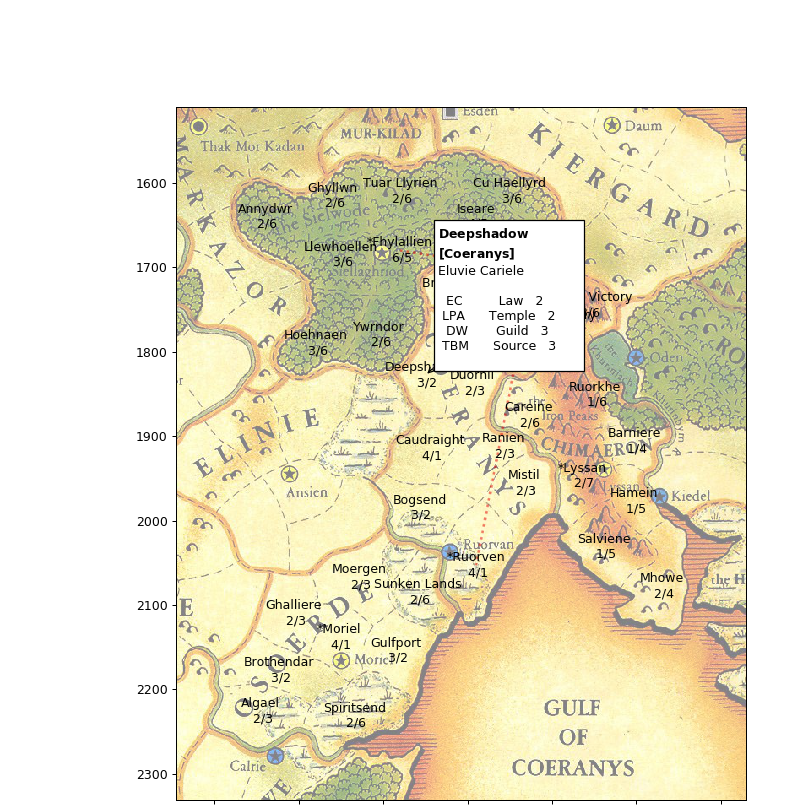

In [4]:
from source.regency import Regency
from source.mapping import Mapping
Game = Regency()
Map = Mapping(Game)
Map.focus_regions(['Eastern Marches'])
Map.show(show_troops=True)

In [ ]:
Game.Espionage